# Ecommerce-clothing-recommendation-prediction

**Goal : Predicting Ecommerce cloth Recommendation & Analyzing the reviews**

**Dataset** : [Kaggle women ecommerce clothing review](https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews)

## Motivation

***What basis people are doing a recommedation ?***

1. Suggesting the business to significant words for recommended products
2. Suggesting the business to important categories and influencing factors in recommendedation
3. What kind of categories people have more negative reviews and what are they try to say
4. Correlation between Negative review and Recommendation

In [2]:
import pandas as pd
import spacy
import re

from spacy.tokens import Token
from tqdm import tqdm

In [3]:
df = pd.read_csv("..//data//Womens Clothing E-Commerce Reviews.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
Unnamed: 0                 23486 non-null int64
Clothing ID                23486 non-null int64
Age                        23486 non-null int64
Title                      19676 non-null object
Review Text                22641 non-null object
Rating                     23486 non-null int64
Recommended IND            23486 non-null int64
Positive Feedback Count    23486 non-null int64
Division Name              23472 non-null object
Department Name            23472 non-null object
Class Name                 23472 non-null object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [5]:
# Removed index from dataframe
df=df.drop(columns=["Unnamed: 0"])

In [6]:
df.describe()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936
std,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


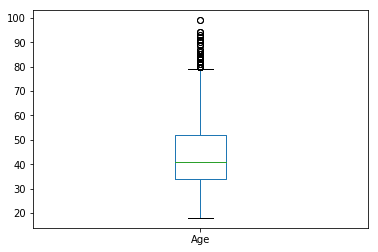

In [8]:
# Data are well distributed between Ages.
df["Age"].plot(kind="box")

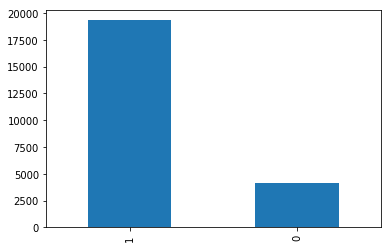

In [10]:
## Seggregation between Recomendation - yes and no
df["Recommended IND"].value_counts().plot(kind="bar")

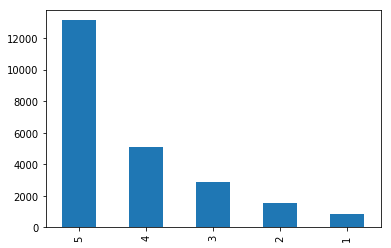

In [65]:
df['Rating'].value_counts().plot("bar")

## Missing reviews check

In [41]:
## Title has more null values (more than 15%)
pd.isnull(df['Title']).value_counts()

False    19676
True      3810
Name: Title, dtype: int64

In [42]:
# Review has less than 5% null values.
pd.isnull(df['Review Text']).value_counts()

False    22641
True       845
Name: Review Text, dtype: int64

In [43]:
df["TitleisNull"]=pd.isnull(df['Title'])
df["ReviewisNull"]=pd.isnull(df['Review Text'])

In [56]:
# Can remove the null values for Department - For weighting the categorizing
df.groupby(['Class Name',"ReviewisNull"]).size().reset_index().sort_values(by="Class Name")

,Class Name,ReviewisNull,0
0,Blouses,False,2983
1,Blouses,True,114
2,Casual bottoms,False,1
3,Casual bottoms,True,1
4,Chemises,False,1
5,Dresses,False,6145
6,Dresses,True,174
7,Fine gauge,False,1059
8,Fine gauge,True,41
10,Intimates,True,7


In [55]:
# Can remove the null values for Department - For weighting the categorizing 
df.groupby(['Department Name',"ReviewisNull"]).size().reset_index().sort_values(by="Department Name")

,Department Name,ReviewisNull,0
0,Bottoms,False,3662
1,Bottoms,True,137
2,Dresses,False,6145
3,Dresses,True,174
4,Intimate,False,1653
5,Intimate,True,82
6,Jackets,False,1002
7,Jackets,True,30
8,Tops,False,10048
9,Tops,True,420


## Values in each categories

In [20]:
df['Division Name'].value_counts()

General           13850
General Petite     8120
Initmates          1502
Name: Division Name, dtype: int64

In [21]:
df['Department Name'].value_counts()

Tops        10468
Dresses      6319
Bottoms      3799
Intimate     1735
Jackets      1032
Trend         119
Name: Department Name, dtype: int64

In [36]:
df['Class Name'].value_counts()

Dresses           6319
Knits             4843
Blouses           3097
Sweaters          1428
Pants             1388
Jeans             1147
Fine gauge        1100
Skirts             945
Jackets            704
Lounge             691
Swim               350
Outerwear          328
Shorts             317
Sleep              228
Legwear            165
Intimates          154
Layering           146
Trend              119
Casual bottoms       2
Chemises             1
Name: Class Name, dtype: int64

In [33]:
df.groupby(['Division Name','Department Name', 'Class Name']).size().reset_index().sort_values(by='Division Name', ascending=False)

,Division Name,Department Name,Class Name,0
5,General,Dresses,Dresses,3730
10,General,Tops,Knits,3259
16,General Petite,Dresses,Dresses,2589
8,General,Tops,Blouses,1993
22,General Petite,Tops,Knits,1584
20,General Petite,Tops,Blouses,1104
11,General,Tops,Sweaters,900
2,General,Bottoms,Pants,835
1,General,Bottoms,Jeans,787
9,General,Tops,Fine gauge,685
